# Delivery Time

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [4]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [47]:
df.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.831242
sortingtime,0.831242,1.000000


In [8]:
df = df.rename({'Delivery Time':'deliverytime', 'Sorting Time':'sortingtime'},axis=1)
df

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\Unnati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


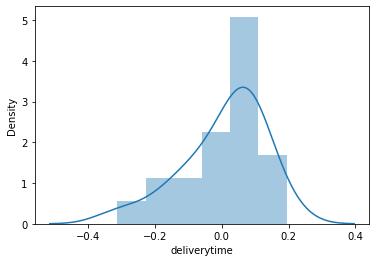

<Figure size 432x288 with 0 Axes>

In [14]:
df['deliverytime'] = np.log(df['deliverytime'])
sns.distplot(df['deliverytime'])
fig = plt.figure()

C:\Users\Unnati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


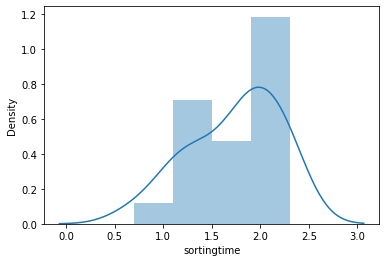

<Figure size 432x288 with 0 Axes>

In [65]:
df['sortingtime'] = np.log(df['sortingtime'])
sns.distplot(df['sortingtime'])
fig = plt.figure()

In [23]:
origin_series = pd.Series()
cat_origin = origin_series.astype('category')

C:\Users\Unnati\AppData\Local\Temp\ipykernel_3204\2470610808.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  origin_series = pd.Series()


In [29]:
df['deliverytime'].describe()

count    21.000000
mean      0.006848
std       0.124060
min      -0.311839
25%      -0.044427
50%       0.056472
75%       0.088909
max       0.194011
Name: deliverytime, dtype: float64

In [30]:
df['sortingtime'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: sortingtime, dtype: float64

In [40]:
dummy = pd.get_dummies(bins, prefix='deliverytime')

In [41]:
dummy

,deliverytime_3,deliverytime_7,deliverytime_8,deliverytime_10,deliverytime_13
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [48]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
# you need to convert this back to a dataframe
dum_df = pd.DataFrame()

In [51]:
import statsmodels.formula.api as smf
model = smf.ols("deliverytime~sortingtime", data = df).fit()

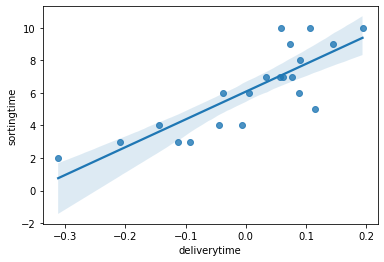

In [53]:
sns.regplot(x = "deliverytime", y = "sortingtime", data = df);

In [54]:
#Coefficient
model.params

Intercept     -0.244284
sortingtime    0.040567
dtype: float64

In [55]:
#tvalues and pvalues
model.tvalues, '\n', model.pvalues

(Intercept     -5.885070
 sortingtime    6.517767
 dtype: float64,
 '\n',
 Intercept      0.000011
 sortingtime    0.000003
 dtype: float64)

## Predict for New Data

In [80]:
#Predict for 200 and 300 daily circulation
newdf=pd.Series([200,300])

In [81]:
df_pred=pd.DataFrame(newdf,columns=['sortingtime'])

In [59]:
model.predict(data_pred)

0     7.869215
1    11.925964
dtype: float64

# Salary Data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [61]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [63]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Unnati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


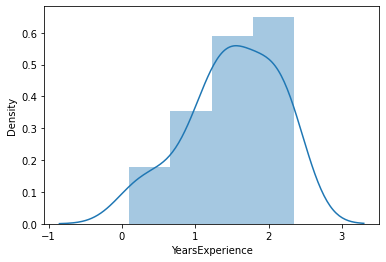

<Figure size 432x288 with 0 Axes>

In [66]:
data['YearsExperience'] = np.log(data['YearsExperience'])
sns.distplot(data['YearsExperience'])
fig = plt.figure()

C:\Users\Unnati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


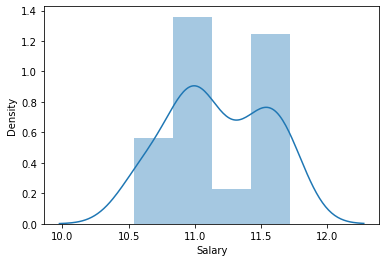

<Figure size 432x288 with 0 Axes>

In [64]:
data['Salary'] = np.log(data['Salary'])
sns.distplot(data['Salary'])
fig = plt.figure()

In [67]:
origin_series = pd.Series()
cat_origin = origin_series.astype('category')

C:\Users\Unnati\AppData\Local\Temp\ipykernel_3204\2470610808.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  origin_series = pd.Series()


In [68]:
data['YearsExperience'].describe()

count    30.000000
mean      1.504979
std       0.624233
min       0.095310
25%       1.163151
50%       1.546656
75%       2.040171
max       2.351375
Name: YearsExperience, dtype: float64

In [69]:
data['Salary'].describe()

count    30.000000
mean     11.173975
std       0.368787
min      10.538237
25%      10.945892
50%      11.085708
75%      11.518272
max      11.714976
Name: Salary, dtype: float64

In [70]:
dummy = pd.get_dummies(bins, prefix='Salary')

In [71]:
dummy

,Salary_3,Salary_7,Salary_8,Salary_10,Salary_13
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [73]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
# you need to convert this back to a dataframe
dum_data = pd.DataFrame()

In [75]:
import statsmodels.formula.api as smf
model = smf.ols("YearsExperience~Salary", data = data).fit()

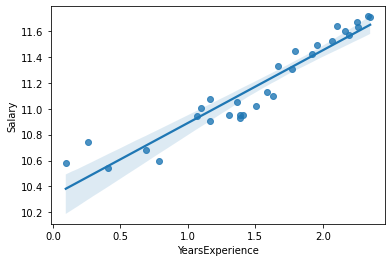

In [76]:
sns.regplot(x = "YearsExperience", y = "Salary", data = data);

In [77]:
#Coefficient
model.params

Intercept   -16.490132
Salary        1.610448
dtype: float64

In [78]:
#tvalues and pvalues
model.tvalues, '\n', model.pvalues

(Intercept   -14.977052
 Salary       16.352542
 dtype: float64,
 '\n',
 Intercept    6.781355e-15
 Salary       7.395278e-16
 dtype: float64)

# Predict for New Data

In [79]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [82]:
data_pred=pd.DataFrame(newdata,columns=['Salary'])

In [83]:
model.predict(data_pred)

0    305.599552
1    466.644394
dtype: float64